<a href="https://colab.research.google.com/github/ANDRERAIMUNDO/atividade-02-PPGCC-2025_1/blob/main/Atividade_2_Z_score_e_Binomial_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão A

In [133]:
#Mostrando dados do dataset importado
#Fonte: https://dados.gov.br/dados/organizacoes/visualizar/agencia-nacional-de-telecomunicacoes
import pandas as pd
# Carregar o CSV conjunto-dados.csv
#data = pd.read_csv('nomes.csv.gz', compression='gzip')
data = pd.read_csv('solar_energy.csv')
display(data.head(5))

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


,count
generated_solar_energy,
Alta,2313
Baixa,1173
Média,727


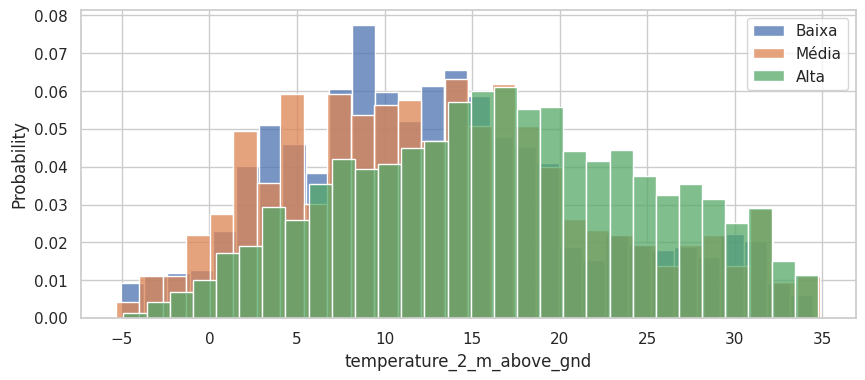

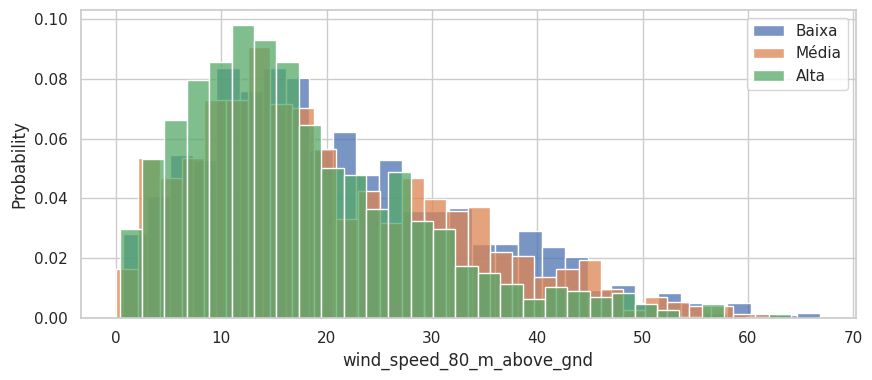

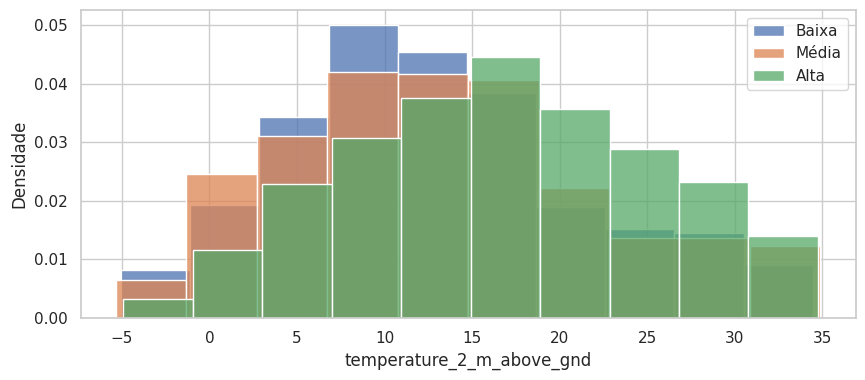

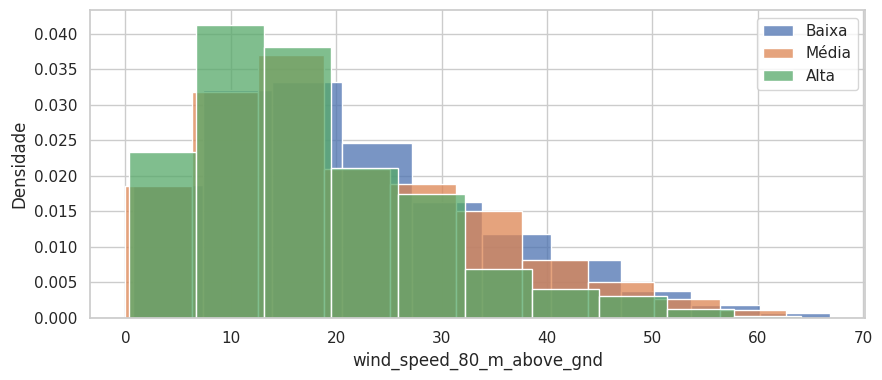

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#https://www.kaggle.com/datasets/stucom/solar-energy-power-generation-dataset/data
dataSet = pd.read_csv('solar_energy.csv')
def generate_solar_ernegy(valor):
    if valor <= 300:
        return 'Baixa'
    elif valor <= 700:
        return 'Média'
    else:
        return 'Alta'

dataSet['generated_solar_energy'] = dataSet['generated_power_kw'].apply(generate_solar_ernegy)
display(dataSet['generated_solar_energy'].value_counts())
features = ['temperature_2_m_above_gnd', 'wind_speed_80_m_above_gnd']

for feature in features:
    plt.figure(figsize=(10, 4))
    for classe in ['Baixa', 'Média', 'Alta']:
        subset = dataSet[dataSet['generated_solar_energy'] == classe]
        sns.histplot(subset[feature], bins=30, label=classe, kde=False, stat="probability")
    plt.xlabel(feature); plt.ylabel('Probability'); plt.legend(); plt.show()

for feature in features:
    plt.figure(figsize=(10, 4))
    for classe in ['Baixa', 'Média', 'Alta']:
        subset = dataSet[dataSet['generated_solar_energy'] == classe]
        sns.histplot(subset[feature], bins=10, label=classe, kde=False, stat="density")
    plt.xlabel(feature); plt.ylabel('Densidade'); plt.legend(); plt.show()


Com base no DataSet do exemplo, obtemos a densidade usando:
Densidade = Frequencia/n*Largura
linha de representação expressa em (...sns.histplot...stat="probability")
Da mesma forma pode-se obter a probalibilidade da temperatura cair e um determinado perído com probabilidade de menor geração de ernegia, para isso usamos:
P = valor bin / total valores

# Questão B


Situação: O sistema de controle e gestão de risco detecta uma queda de desempenho na rede. A politica coorporativa da empresa adota o COBIT como modelo de governança, umas das regras alinhada as estrategias de negocios da empresa é manter problemas operacionais sempre abaixo de 6%. O sistema ao detectar um desvio acima da meedia inicia seu processo de recuperação a apoio a tomada de decisão conforme é ilustrado na imagem abaixo referente ao trabalho 01.

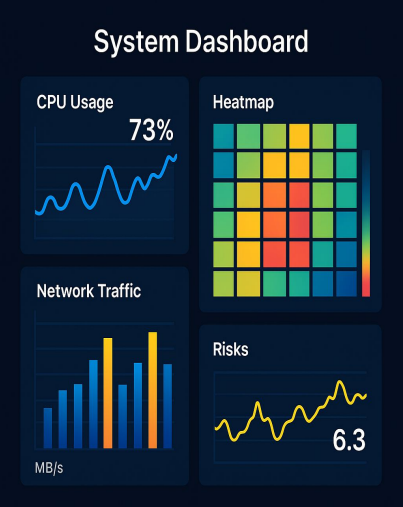
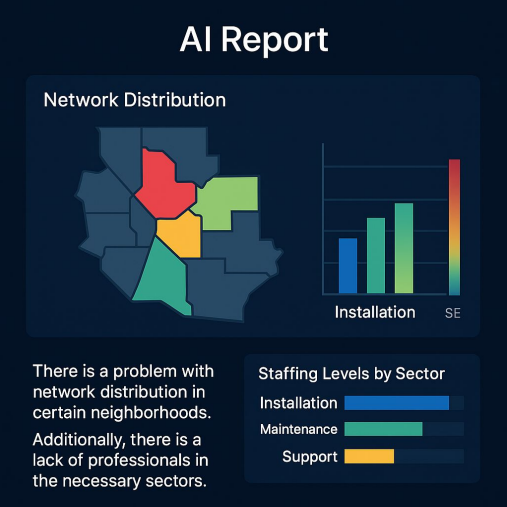


O código abaixo é uma base de dados que registra incidentes e a frequência no qual ocorrem.

In [135]:
import pandas as pd
data = pd.read_csv('central/problemas.csv')
display(data.head(20))

,ProblemID,RelatedIncident,RootCause,Frequency,Status
0,PRB0001,INC0105,Conexão instável,8,Investigando
1,PRB0002,INC0162,Manutenção mal sucedida,1,Corrigido
2,PRB0003,INC0003,Erro de firmware,8,Corrigido
3,PRB0004,INC0007,Sobrecarga elétrica,6,Investigando
4,PRB0005,INC0264,Conexão instável,9,Investigando
5,PRB0006,INC0301,Erro de firmware,4,Identificado
6,PRB0007,INC0175,Conexão instável,4,Corrigido
7,PRB0008,INC0077,Conexão instável,8,Investigando
8,PRB0009,INC0447,Sobrecarga elétrica,6,Corrigido
9,PRB0010,INC0062,Manutenção mal sucedida,5,Corrigido


Umas das formas para analisar as falhas usamos a distribuição de Poisson, o gráfico abaixo mostra a frequência de erros ocorridos tendo como parâmetro Frequency.

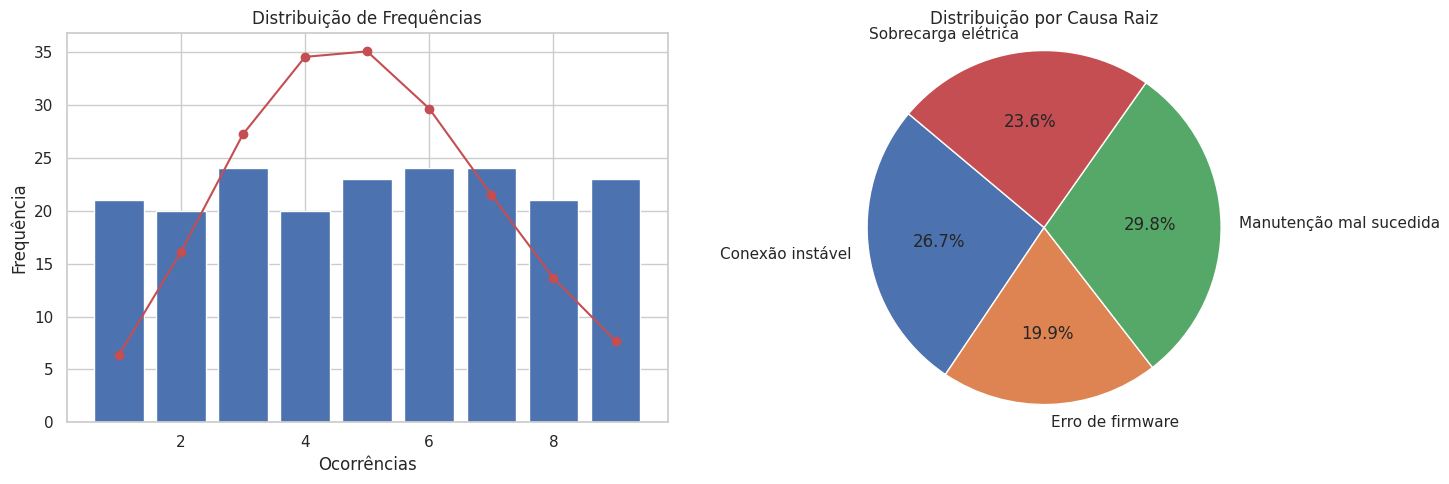

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

data = pd.read_csv('central/problemas.csv')

frequency = data["Frequency"]
lambda_poisson = frequency.mean()
value, counter_in_adjustment = np.unique(frequency, return_counts=True)
poisson = poisson.pmf(value, mu=lambda_poisson) * len(frequency)
general_root_cause = data.groupby("RootCause")["Frequency"].sum()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(value, counter_in_adjustment, alpha=1.0)
axs[0].plot(value, poisson, 'ro-')
axs[0].set_xlabel("Ocorrências")
axs[0].set_ylabel("Frequência")
axs[0].set_title("Distribuição de Frequências")
axs[0].grid(True)
axs[1].pie(general_root_cause, labels=general_root_cause.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title("Distribuição por Causa Raiz")
axs[1].axis('equal')

plt.tight_layout()
plt.show()


Usando o mesmo modelo de distribuição anterior a um nível organizacional a tomada de decisão os dados podem ser mostrados de diversas formas, como o exemplo abaixo.

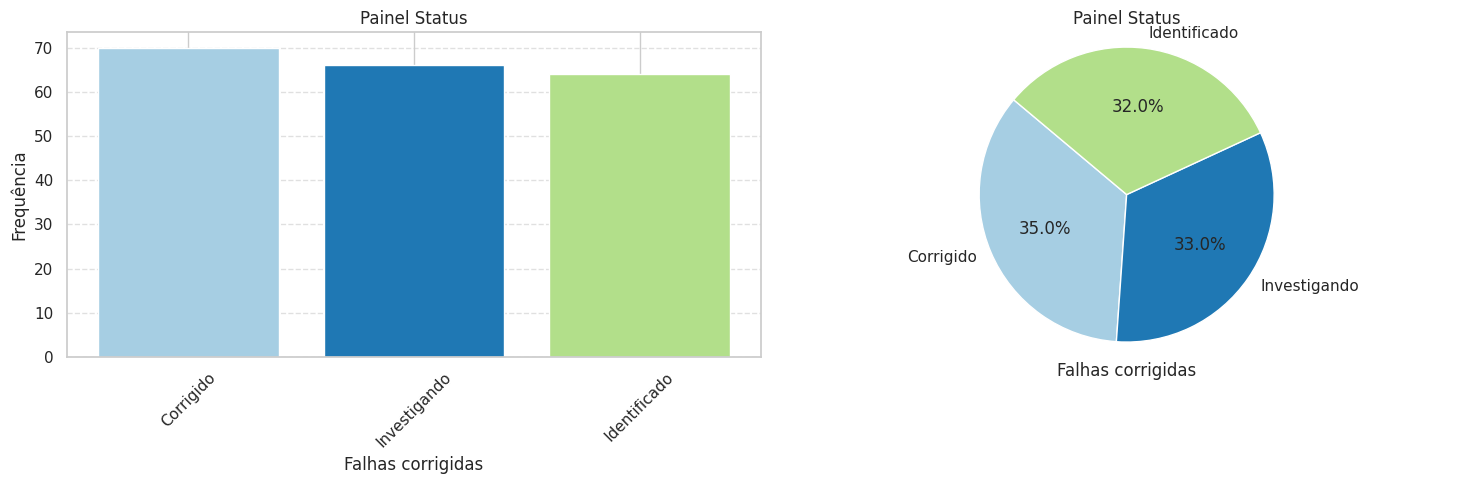

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

data = pd.read_csv('central/problemas.csv')

general_root_cause = data.groupby("RootCause")["Frequency"].sum()
status_counts = data['Status'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].bar(status_counts.index, status_counts.values, color=plt.cm.Paired.colors)
axs[0].set_title('Painel Status')
axs[0].set_xlabel('Falhas corrigidas')
axs[0].set_ylabel('Frequência')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.6)
axs[1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[1].set_title('Painel Status')
axs[1].set_xlabel('Falhas corrigidas')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


Para atender ao princípio Holístico e de Integridade entende-se que Status **Investigando** + **Identificado** = **não corrigido**.

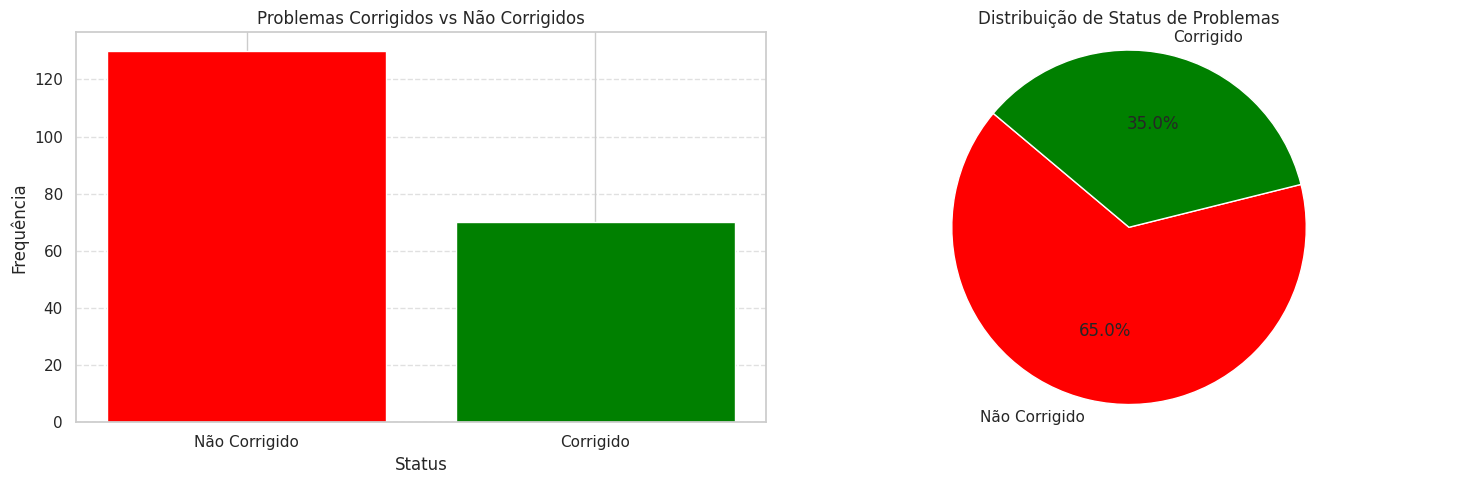

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('central/problemas.csv')

data['Status Agrupado'] = data['Status'].apply(lambda x: 'Corrigido' if x == 'Corrigido' else 'Não Corrigido')
counts = data['Status Agrupado'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(counts.index, counts.values, color=['red', 'green'])
axs[0].set_title('Problemas Corrigidos vs Não Corrigidos')
axs[0].set_xlabel('Status')
axs[0].set_ylabel('Frequência')
axs[0].tick_params(axis='x', rotation=0)
axs[0].grid(axis='y', linestyle='--', alpha=0.6)
axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
axs[1].set_title('Distribuição de Status de Problemas')
axs[1].axis('equal')

plt.tight_layout()
plt.show()


Para a criação de melhores práticas de gerenciamento de serviços de TI primeiro definimos as prioridades cruzando os novos inputs dos registros de incidentes com dados históricos de incidentes da empresa.

,RootCause,Score,Probabilidade_Sucesso
0,Conexão instável,125.124409,19.1
1,Conexão instável,124.277033,19.1
2,Conexão instável,114.424887,19.1
3,Conexão instável,119.781297,19.1
4,Conexão instável,116.555932,19.1


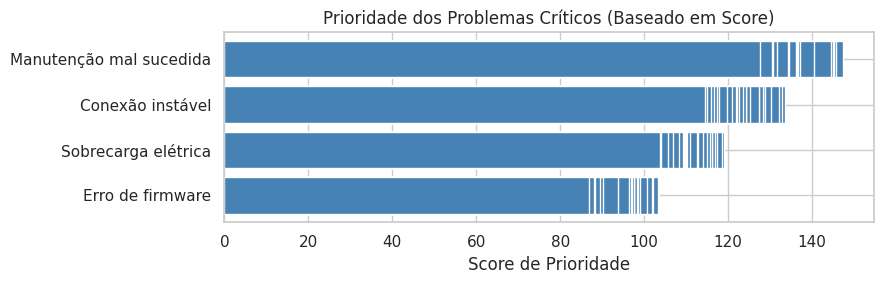

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('central/problemas.csv')
historical = pd.read_csv('historico_rootcause.csv')

total_problemas = data['Frequency'].sum()

rootcause_criticos = data.groupby('RootCause')['Frequency'].sum()
rootcause_criticos = rootcause_criticos[rootcause_criticos / total_problemas > 0.06]
rootcause_criticos = rootcause_criticos.reset_index()
rootcause_criticos.columns = ['RootCause', 'Frequency']

df_critico = rootcause_criticos.merge(historical, on='RootCause')

df_critico['Score'] = (
    df_critico['Frequency'] * 0.4 +
    df_critico['Ocorrencias_anteriores'] * 0.3 +
    (1 / df_critico['Tempo_medio_resolucao']) * 100 * 0.3
)

# simulations
sigma = df_critico['Desvio_padrao'].tolist()
simulacoes = {
    row['RootCause']: np.random.normal(loc=row['Tempo_medio_resolucao'], scale=sigma[i], size=1000)
    for i, row in df_critico.iterrows()
}
#Probability
max_acceptable_time = 5
probability = {
    causa: np.mean(sim < max_acceptable_time) * 100
    for causa, sim in simulacoes.items()
}

df_critico['Probabilidade_Sucesso'] = df_critico['RootCause'].map(probability)
display(df_critico[['RootCause', 'Score', 'Probabilidade_Sucesso']].head(5))

df_critico = df_critico.sort_values(by='Score', ascending=False)
plt.figure(figsize=(9, 3))
plt.barh(df_critico['RootCause'], df_critico['Score'], color='steelblue')
plt.xlabel('Score de Prioridade')
plt.title('Prioridade dos Problemas Críticos (Baseado em Score)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Definida as prioridades mais críticas, a equipe de TI inicia seu processo de recuperação a apoio a tomada de decisão,é possível obter uma uma nova população da base **historico_rootcause**, nesse exemplo usamos amostras de 30 elementos.

In [141]:
import pandas as pd
import numpy as np

data = pd.read_csv('historico_rootcause.csv')

agrupado = data.groupby('RootCause').agg({
    'Tempo_medio_resolucao': 'mean',
    'Desvio_padrao': 'mean'
}).reset_index()

medias_tlc = []

for _, row in agrupado.iterrows():
    causa = row['RootCause']
    mu = row['Tempo_medio_resolucao']
    sigma = row['Desvio_padrao']

    simulacoes = np.random.normal(loc=mu, scale=sigma, size=1000)

    for _ in range(500):
        amostra = np.random.choice(simulacoes, size=30, replace=True)
        media = np.mean(amostra)
        medias_tlc.append({'RootCause': causa, 'Media': media})

df_tlc = pd.DataFrame(medias_tlc)
df_tlc.to_csv('medias_amostrais_tlc.csv', index=False)

display(df_tlc.head(5))

,RootCause,Media
0,Atualização mal aplicada,5.799926
1,Atualização mal aplicada,5.521059
2,Atualização mal aplicada,5.562601
3,Atualização mal aplicada,5.705820
4,Atualização mal aplicada,5.634877



📌 Atualização mal aplicada
  → Média esperada: 5.65 dias
  → IC 95%: (5.64, 5.67) dias


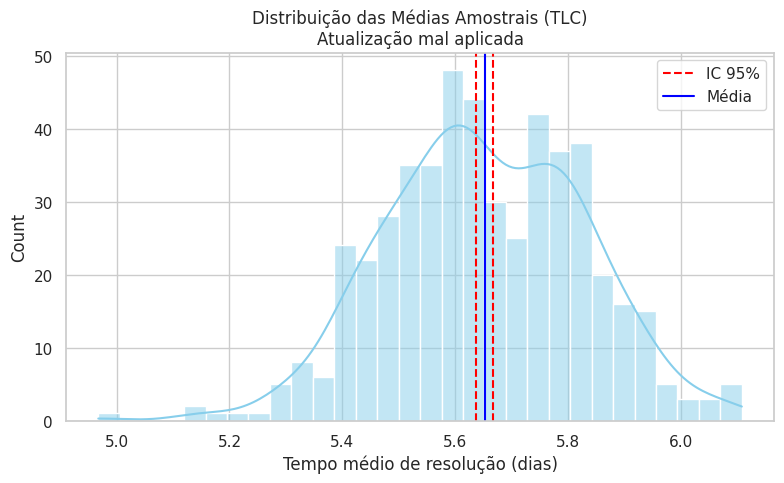


📌 Cabo rompido
  → Média esperada: 5.46 dias
  → IC 95%: (5.44, 5.49) dias


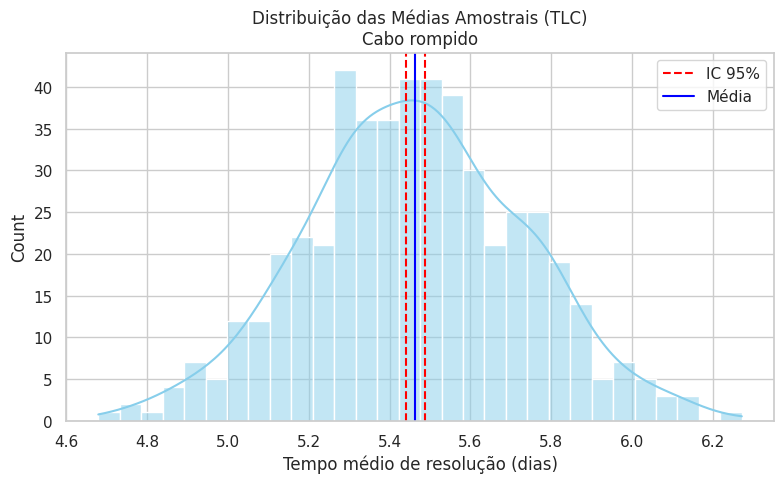


📌 Conexão instável
  → Média esperada: 5.85 dias
  → IC 95%: (5.83, 5.87) dias


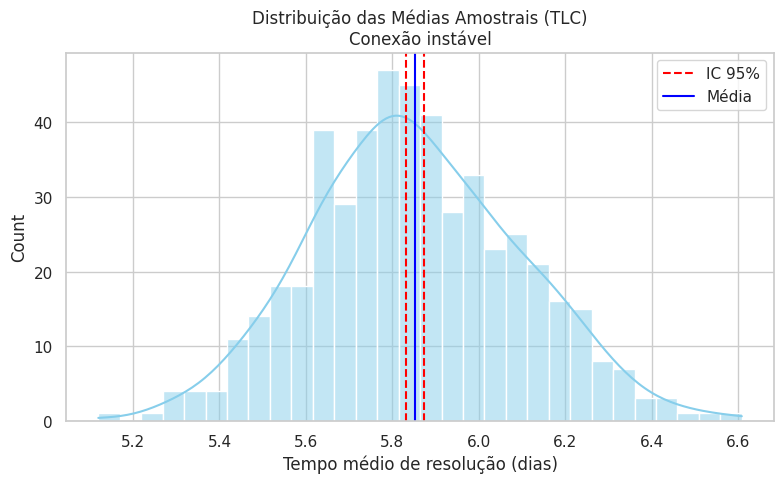


📌 Curto-circuito
  → Média esperada: 5.14 dias
  → IC 95%: (5.12, 5.17) dias


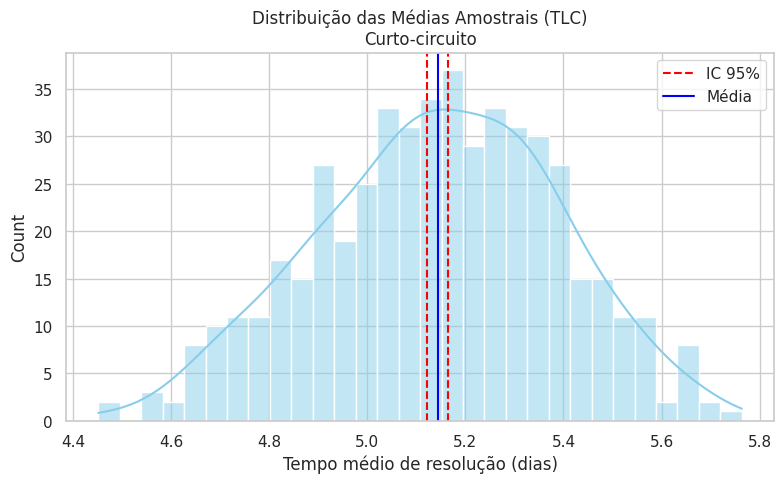


📌 Erro de firmware
  → Média esperada: 5.26 dias
  → IC 95%: (5.23, 5.28) dias


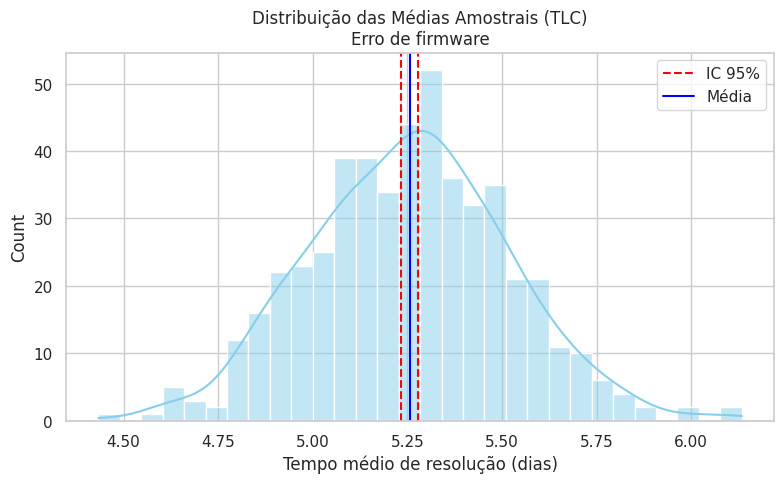


📌 Falha de roteador
  → Média esperada: 5.39 dias
  → IC 95%: (5.37, 5.41) dias


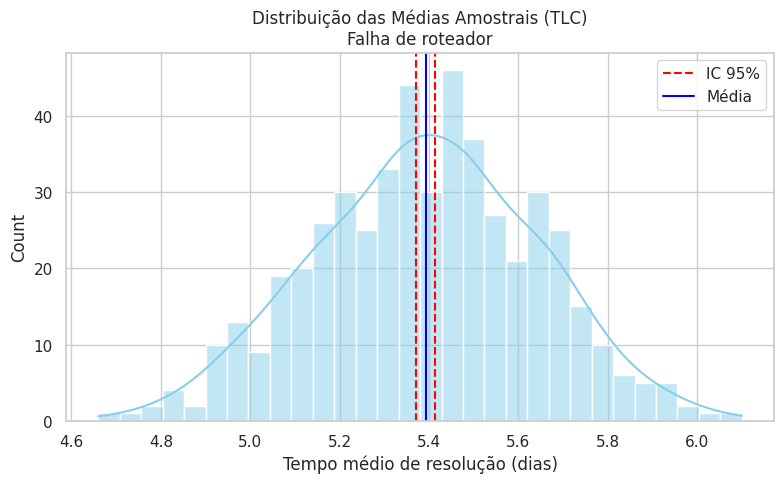


📌 Falta de energia
  → Média esperada: 5.15 dias
  → IC 95%: (5.13, 5.18) dias


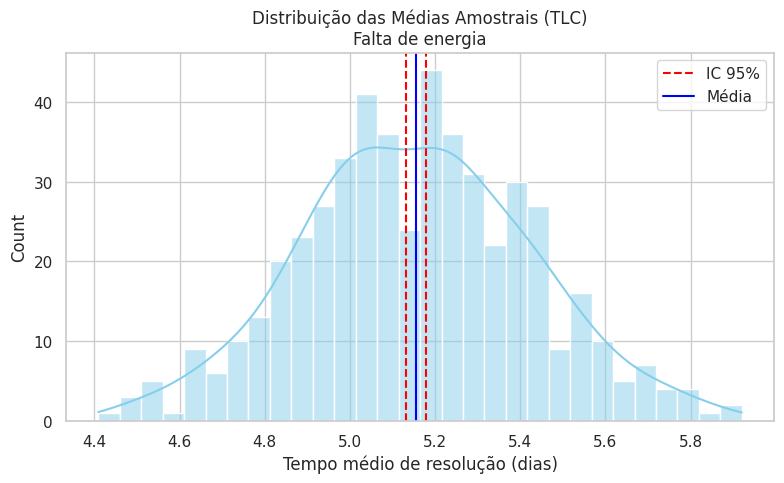


📌 Interferência externa
  → Média esperada: 5.84 dias
  → IC 95%: (5.83, 5.86) dias


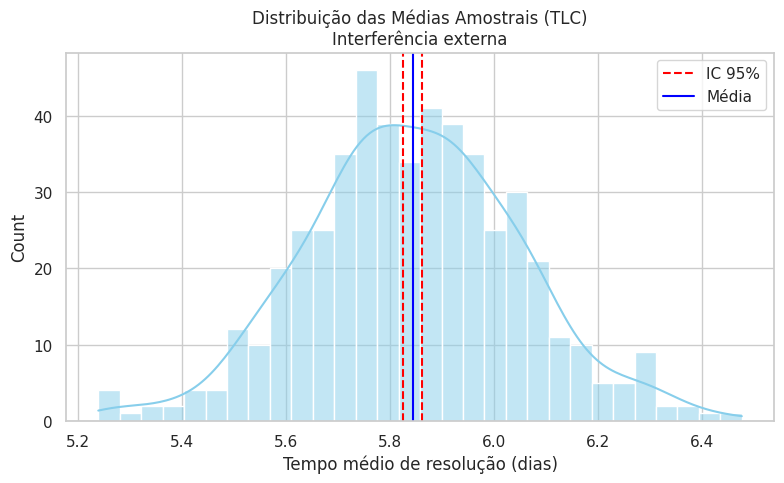


📌 Manutenção mal sucedida
  → Média esperada: 5.01 dias
  → IC 95%: (5.00, 5.03) dias


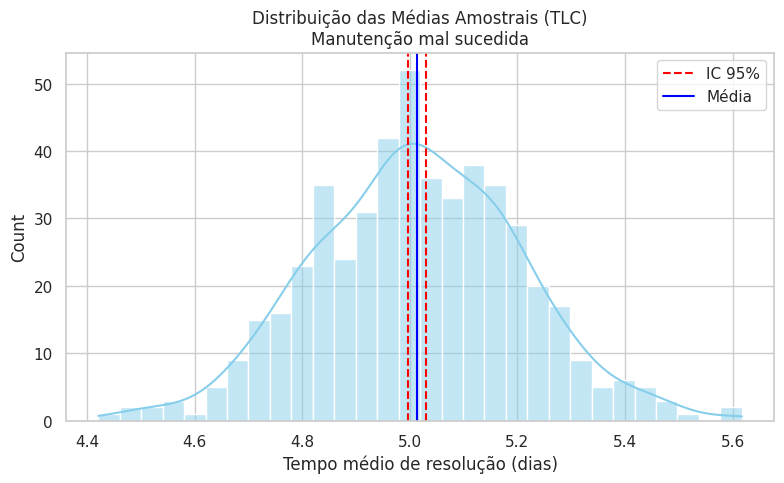


📌 Sobrecarga elétrica
  → Média esperada: 5.49 dias
  → IC 95%: (5.47, 5.51) dias


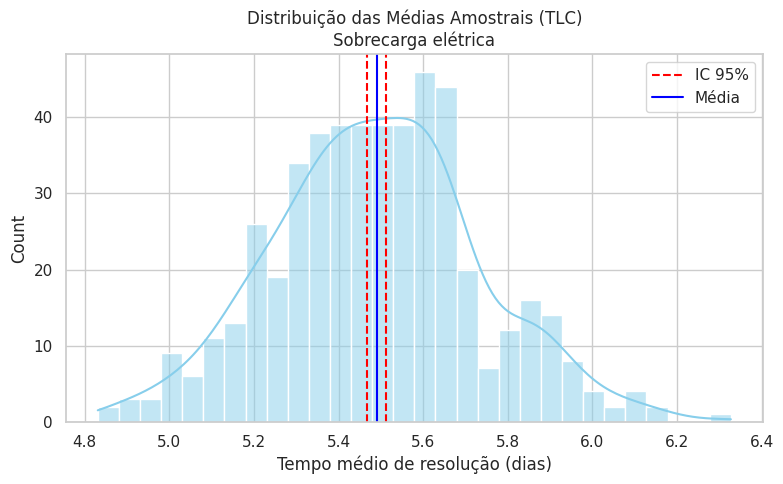

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_tlc = pd.read_csv('medias_amostrais_tlc.csv')
sns.set(style="whitegrid")

for causa in df_tlc['RootCause'].unique():
    subset = df_tlc[df_tlc['RootCause'] == causa]['Media']
    media = subset.mean()
    sem = stats.sem(subset)  # erro default média
    ci = stats.t.interval(0.95, len(subset)-1, loc=media, scale=sem)

    print(f"\n📌 {causa}")
    print(f"  → Média esperada: {media:.2f} dias")
    print(f"  → IC 95%: ({ci[0]:.2f}, {ci[1]:.2f}) dias")

    plt.figure(figsize=(8, 5))
    sns.histplot(subset, bins=30, kde=True, color="skyblue")
    plt.axvline(ci[0], color='red', linestyle='--', label='IC 95%')
    plt.axvline(ci[1], color='red', linestyle='--')
    plt.axvline(media, color='blue', linestyle='-', label='Média')
    plt.title(f"Distribuição das Médias Amostrais (TLC)\n{causa}")
    plt.xlabel("Tempo médio de resolução (dias)")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [143]:
import pandas as pd
from scipy import stats

df = pd.read_csv('medias_amostrais_tlc.csv')

opcoes_resolucao = {
    'Conexão instável': 'Reiniciar rede / Modem / Módulo',
    'Erro de firmware': 'Atualização, rollback, troca chip',
    'Falha de hardware': 'Troca de equipamento / Teste físico',
    'Problema de energia': 'Verificar alimentação / cabeamento',
    'Atualização mal aplicada': 'Realizar downgrade em modo seguro',
    'Cabo rompido':'Registrar Requester TI, sistema de controle SCADA ativado automaticamente',
    'Curto-circuito':'Registrar Requester Técnico de Campo,modulo UPS ativado automaticamente',
    'Falta de energia':'Modulo UPS ativado automaticamente',
    'Manutenção mal sucedida':'Novo registro de reparo, solicitando novo reparo',
    'Sobrecarga elétrica':'Modulo UPS reiniciado',
    'Interferência externa':'Registrar Requester de Engenheiro, sistema de controle SCADA ativado automaticamente',
    'Falha de roteador':'Reiniciar sistema em modo seguro'
}

percentual_sucesso = df.groupby('RootCause')['Media'].apply(lambda x: 1 - x.mean() / 10).clip(0, 1)

def ic(x):
    media = x.mean()
    sem = stats.sem(x)
    ci = stats.t.interval(0.95, len(x)-1, loc=media, scale=sem)
    return f"({ci[0]:.1f} – {ci[1]:.1f})"

ic95 = df.groupby('RootCause')['Media'].apply(ic)
dashboard = pd.DataFrame({
    'RootCause': ic95.index,
    'Opções de Resolução': ic95.index.map(opcoes_resolucao),
    '% Sucesso (simulado)': (percentual_sucesso * 100).round(1).astype(str) + '%',
    'IC 95% Resolução (dias)': ic95.values
})

from IPython.display import display
display(dashboard.style.set_properties(**{'text-align': 'left'}).set_table_styles([
    dict(selector='th', props=[('text-align', 'left')])
]))

,RootCause,Opções de Resolução,% Sucesso (simulado),IC 95% Resolução (dias)
RootCause,,,,
Atualização mal aplicada,Atualização mal aplicada,Realizar downgrade em modo seguro,43.5%,(5.6 – 5.7)
Cabo rompido,Cabo rompido,"Registrar Requester TI, sistema de controle SCADA ativado automaticamente",45.4%,(5.4 – 5.5)
Conexão instável,Conexão instável,Reiniciar rede / Modem / Módulo,41.5%,(5.8 – 5.9)
Curto-circuito,Curto-circuito,"Registrar Requester Técnico de Campo,modulo UPS ativado automaticamente",48.6%,(5.1 – 5.2)
Erro de firmware,Erro de firmware,"Atualização, rollback, troca chip",47.4%,(5.2 – 5.3)
Falha de roteador,Falha de roteador,Reiniciar sistema em modo seguro,46.1%,(5.4 – 5.4)
Falta de energia,Falta de energia,Modulo UPS ativado automaticamente,48.5%,(5.1 – 5.2)
Interferência externa,Interferência externa,"Registrar Requester de Engenheiro, sistema de controle SCADA ativado automaticamente",41.6%,(5.8 – 5.9)
Manutenção mal sucedida,Manutenção mal sucedida,"Novo registro de reparo, solicitando novo reparo",49.9%,(5.0 – 5.0)


# Questão C

Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.

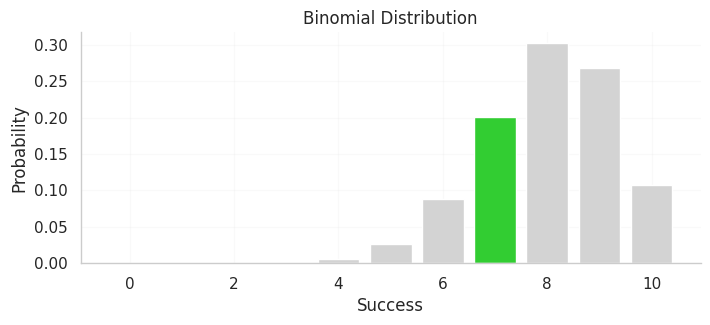

For s = 0.8, simulation:
✅ 0.20✅ 0.20❌ 0.98❌ 0.98✅ 0.60✅ 0.63✅ 0.65✅ 0.39❌ 0.87✅ 0.58
Total success: 7
Probability: 0.2013


In [150]:
import random
import matplotlib.pyplot as plt
from math import comb

n, p = 10, 0.80
inputs = [random.random() for _ in range(n)]
sucess = sum(valor < p for valor in inputs)

prob_binomial = lambda n, x, p: comb(n, x) * (p ** x) * ((1 - p) ** (n - x))
distribution = [prob_binomial(n, x, p) for x in range(n + 1)]

fig, ax = plt.subplots(figsize=(8, 3))
ax.bar(range(n + 1), distribution, color='lightgray')
ax.bar(sucess, distribution[sucess], color='limegreen')
ax.set_xlabel("Success")
ax.set_ylabel("Probability")
ax.set_title("Binomial Distribution")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.grid(True, linestyle="-", alpha=0.1)
plt.show()

print(f"For s = {p}, simulation:")
result = "".join([f"\033[92m✅\033[0m {valor:.2f}" if valor < p else f"\033[91m❌\033[0m {valor:.2f}" for valor in inputs])
print(result)
print(f"Total success: {sucess}")
print(f"Probability: {distribution[sucess]:.4f}")
